In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
params = []
losses_list = []
for solver_name in ['adam', 'rmsprop', 'sgd', 'sgd_momentum']:
    for lr in [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]:
        for decay in [1e-6, 1e-5, 1e-4]:
            save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(solver_name, lr, decay)
            val_loss = np.loadtxt(os.path.join(save_dir, 'val_losses.txt'))
            params.append({
                'solver': solver_name,
                'lr': lr,
                'decay': decay
            })
            losses_list.append(val_loss)

OSError: /home/kmouraviev/FCRN_notebooks/finetune_sgd_momentum_lr0.001_decay1e-05/val_losses.txt not found.

In [3]:
min_losses = [x.min() for x in losses_list]

In [4]:
best_results = np.argsort(min_losses)[:5]

In [5]:
from keras.models import load_model
import h5py

Using TensorFlow backend.


In [6]:
dataset = h5py.File('/home/kmouraviev/NYU_dataset_hdf5/data.hdf5', 'r')
rgbs = dataset['data']
depths = dataset['label']

In [7]:
rgbs_val = rgbs[50000::1000]
depths_val = depths[50000::1000]

In [8]:
def unpreprocess(image):
    img_min = -123
    img_max = 151
    return (image - img_min) / (img_max - img_min)

In [9]:
print(params[best_results[0]])

{'solver': 'sgd', 'lr': 1e-05, 'decay': 1e-05}


In [10]:
best_results

array([31, 30, 32, 35, 33])

In [11]:
losses_list[32]

array([0.25910686, 0.27058581, 0.28440759, 0.2968695 , 0.30197318,
       0.30877145, 0.3150276 , 0.33212074, 0.33141996, 0.33378996,
       0.32985538, 0.34493567, 0.34350914, 0.35166381, 0.35490493,
       0.34293632, 0.35813585, 0.36695147, 0.35000961, 0.36599244])

## Топ-5 результатов

### SGD solver, lr=1e-5, decay=1e-5

In [12]:
import tensorflow as tf

/home/kmouraviev/FCRN_notebooks/finetune_sgd_lr1e-05_decay1e-05/model_on_epoch1.hdf5
MSE: 0.2384594717339557


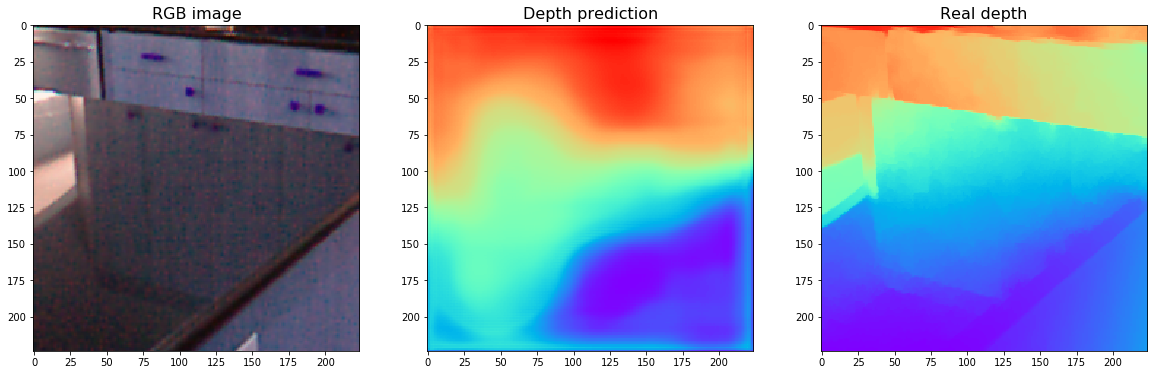

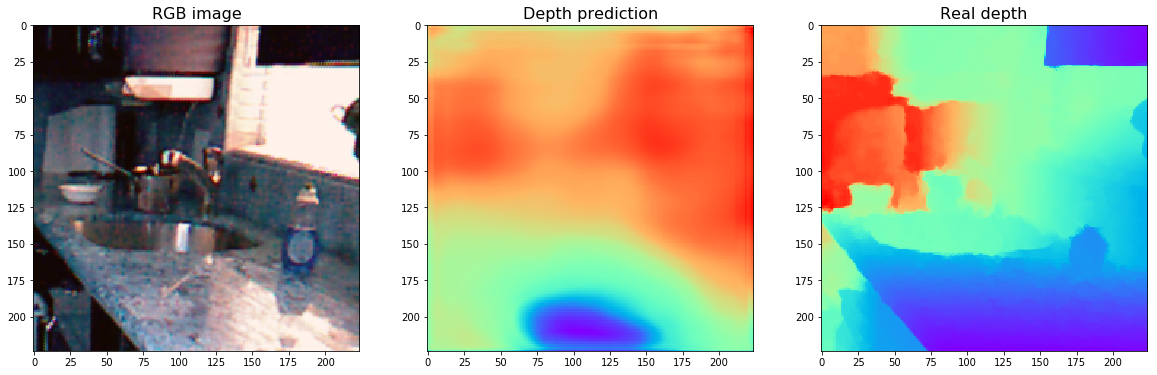

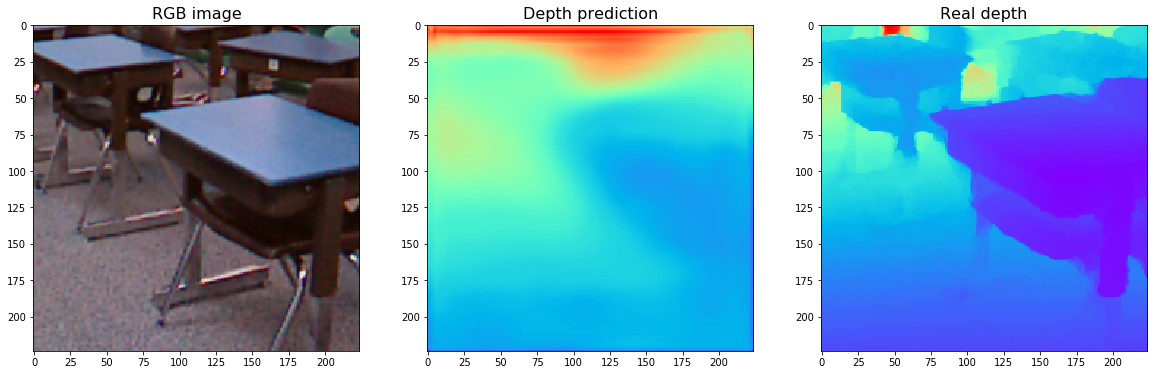

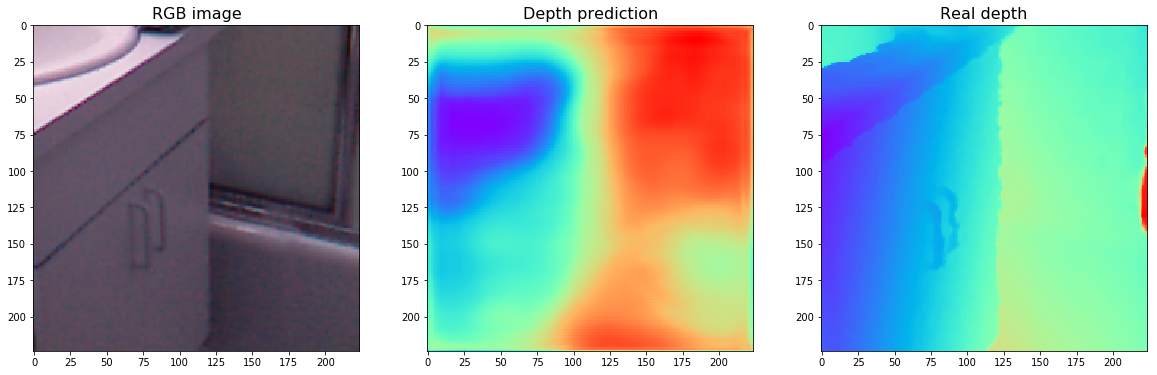

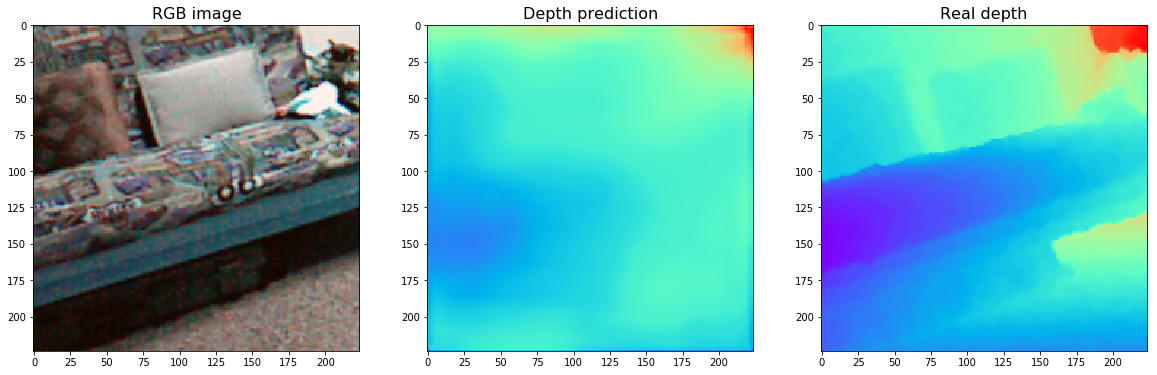

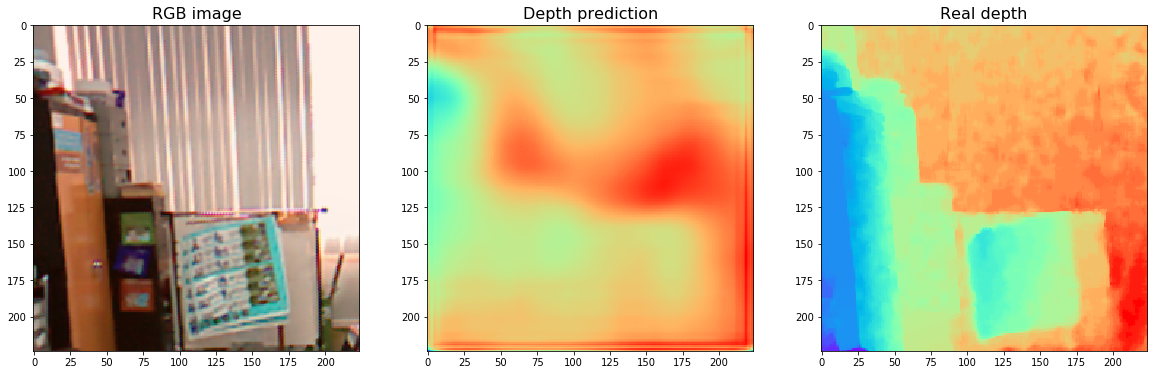

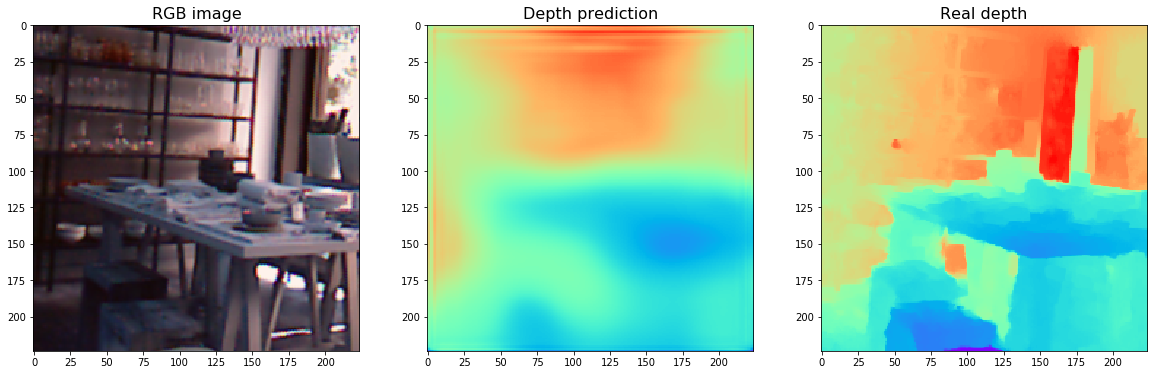

In [13]:
result_id = best_results[0]
best_epoch = losses_list[result_id].argmin()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
#with tf.device('/cpu:0'):
print(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = model.predict(rgbs_val)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr=1e-5, decay=1e-6

MSE: 0.2536002334271609


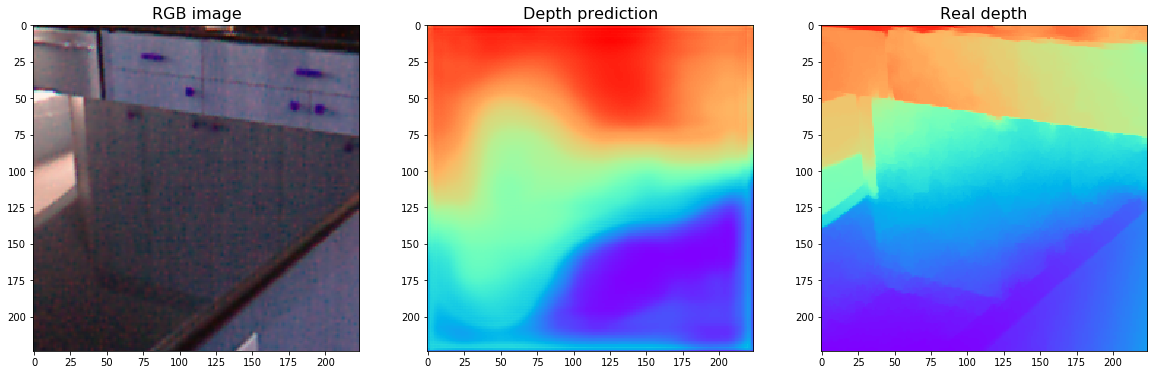

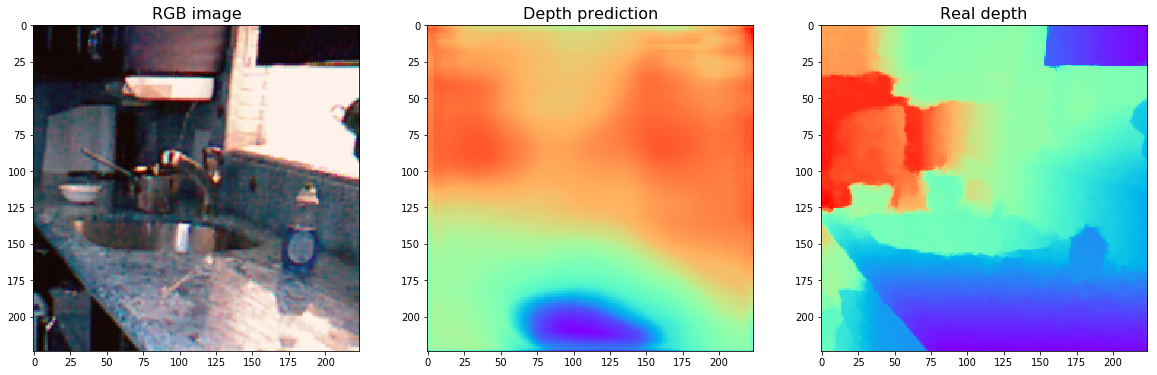

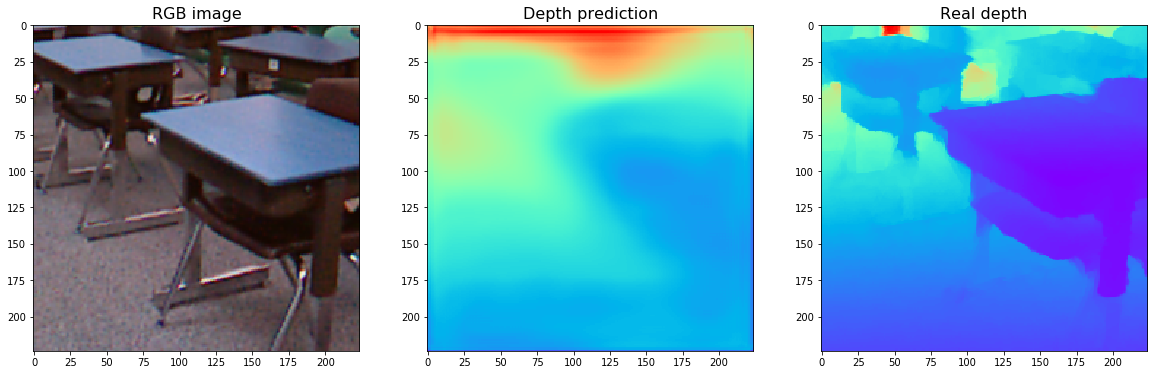

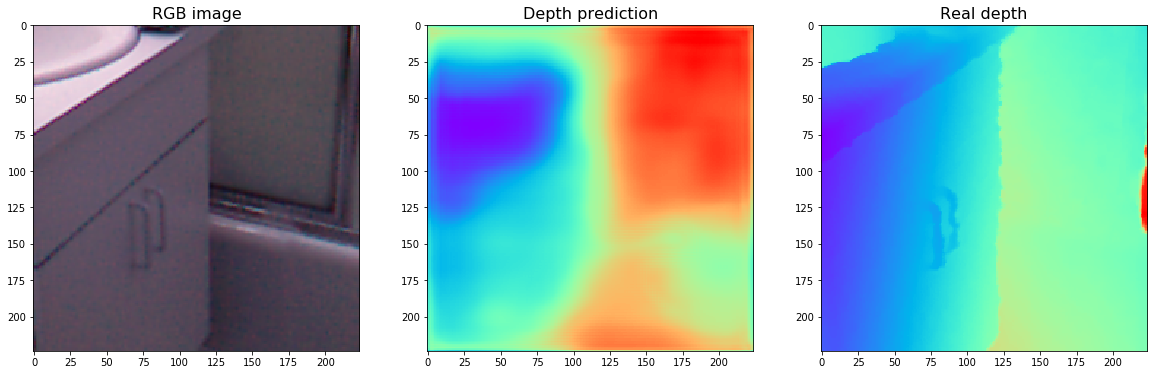

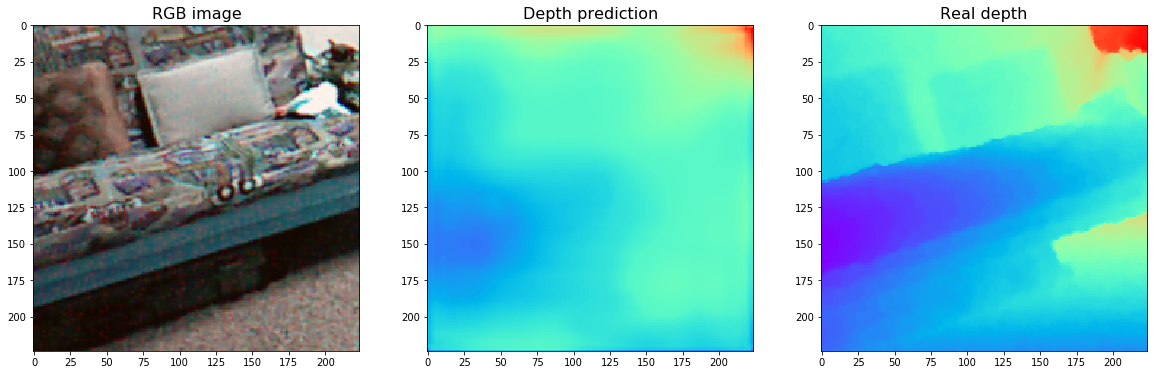

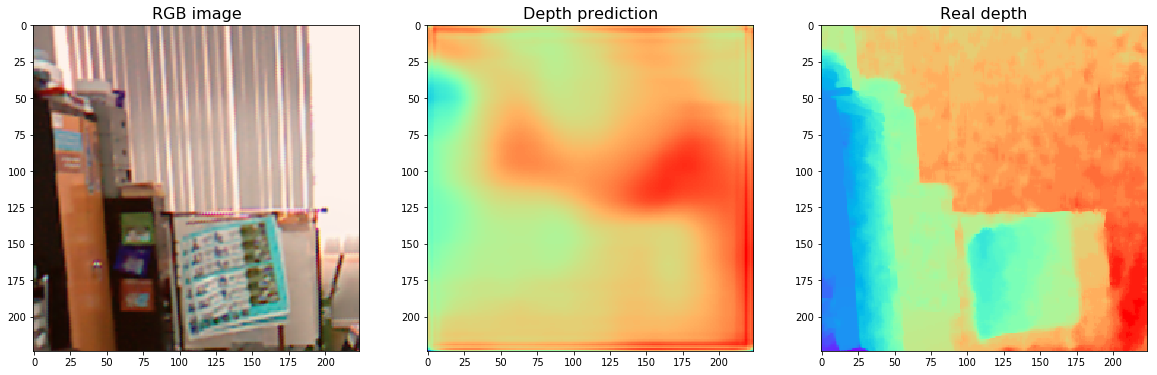

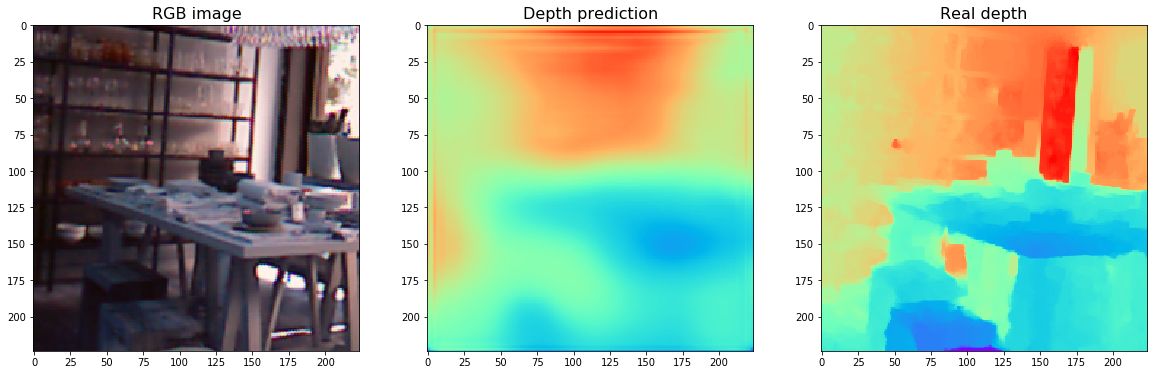

In [14]:
result_id = best_results[1]
best_epoch = losses_list[result_id].argmin()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
#with tf.device('/cpu:0'):
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = model.predict(rgbs_val)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr=1e-5, decay=1e-4

MSE: 0.25878009739621477


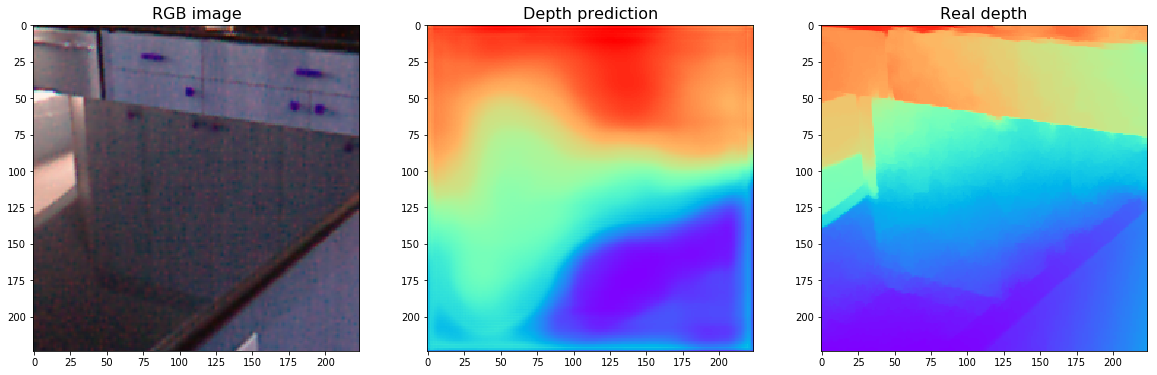

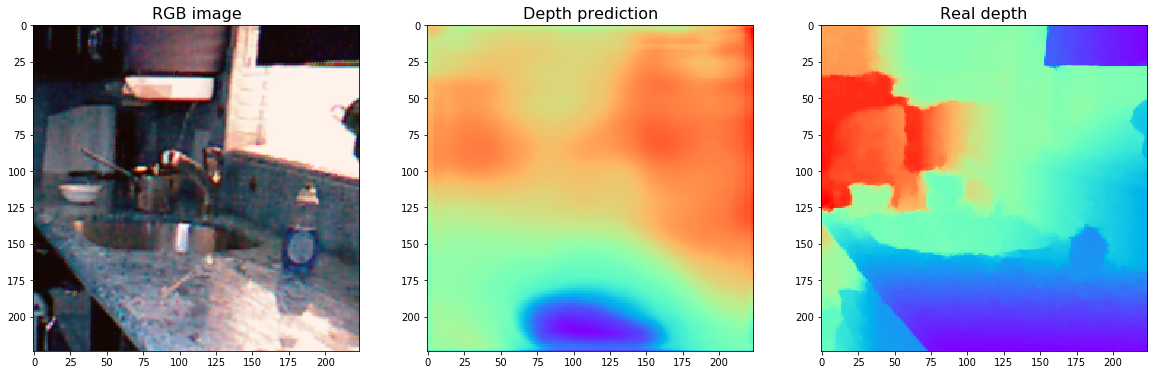

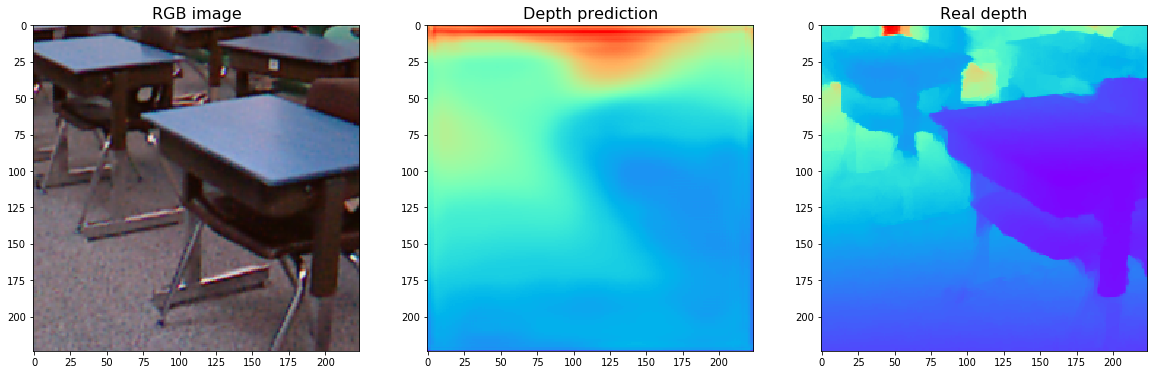

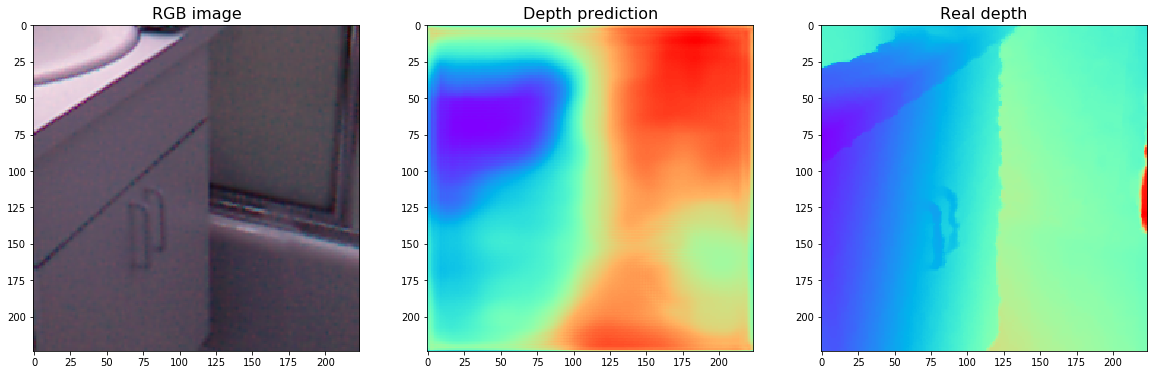

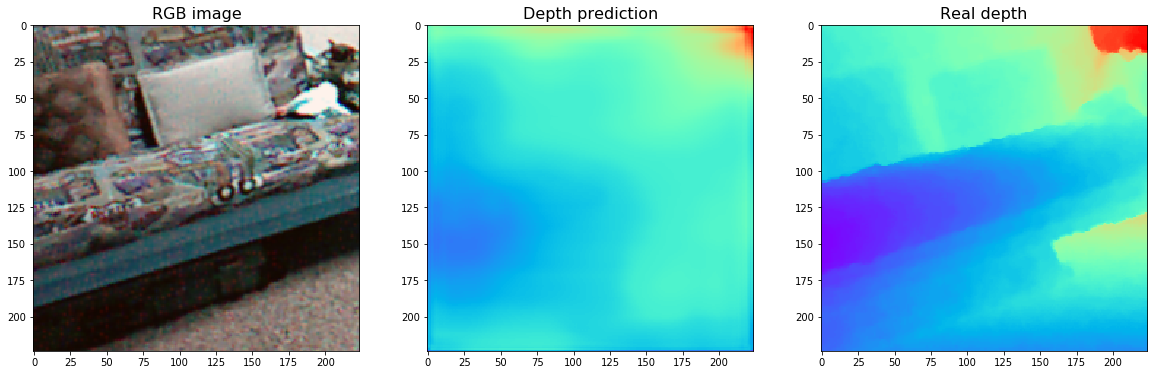

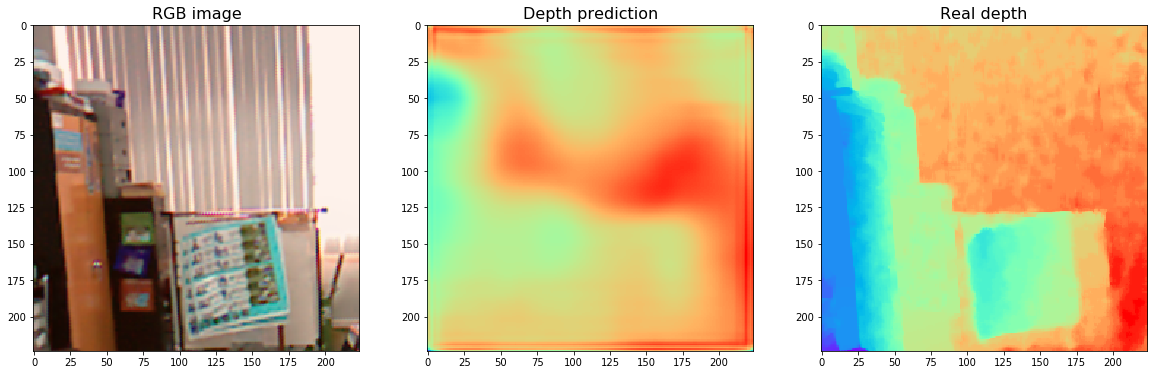

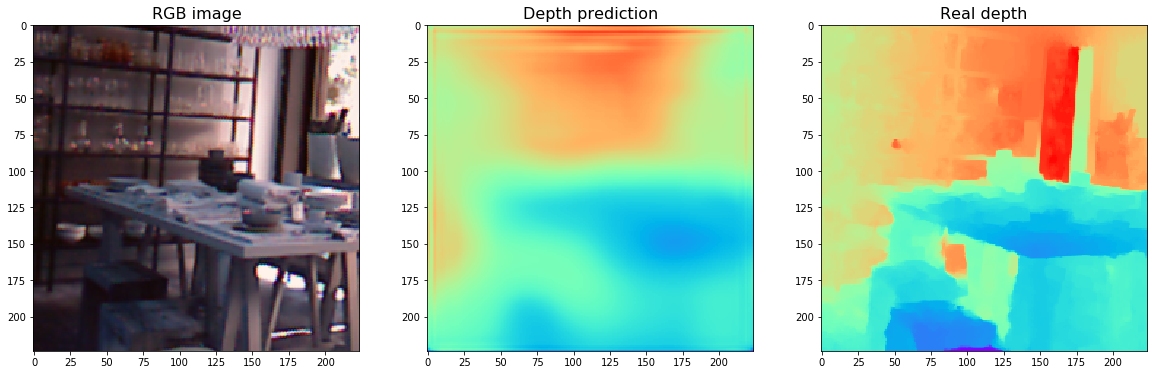

In [15]:
result_id = best_results[2]
best_epoch = losses_list[result_id].argmin()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
with tf.device('/cpu:0'):
    model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
    depth_prediction = model.predict(rgbs_val)
    print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr=3e-5, decay=1e-4

MSE: 0.2923419643817184


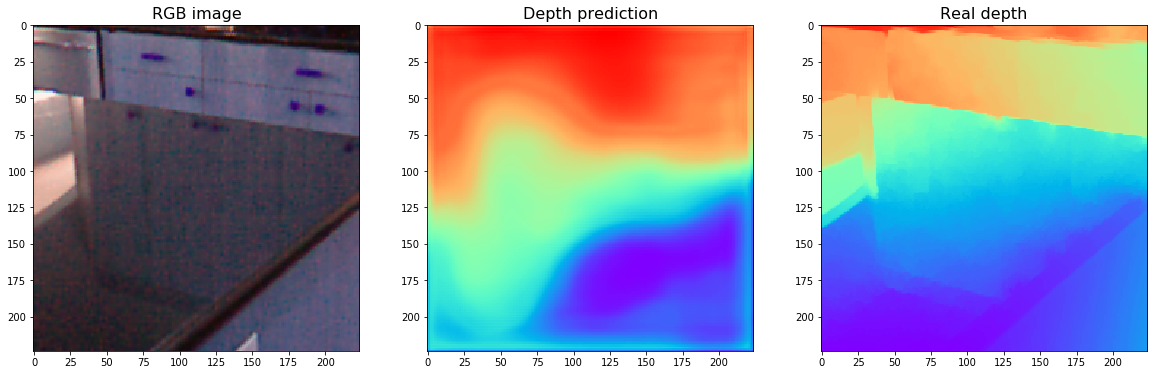

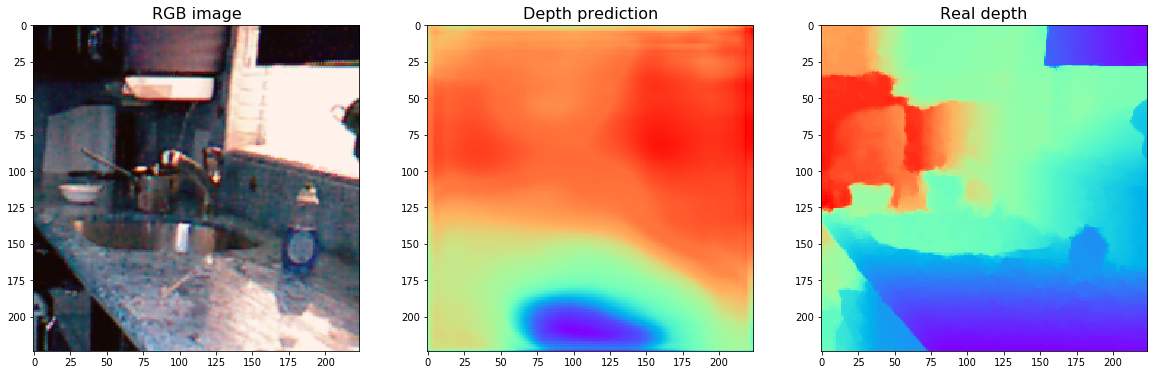

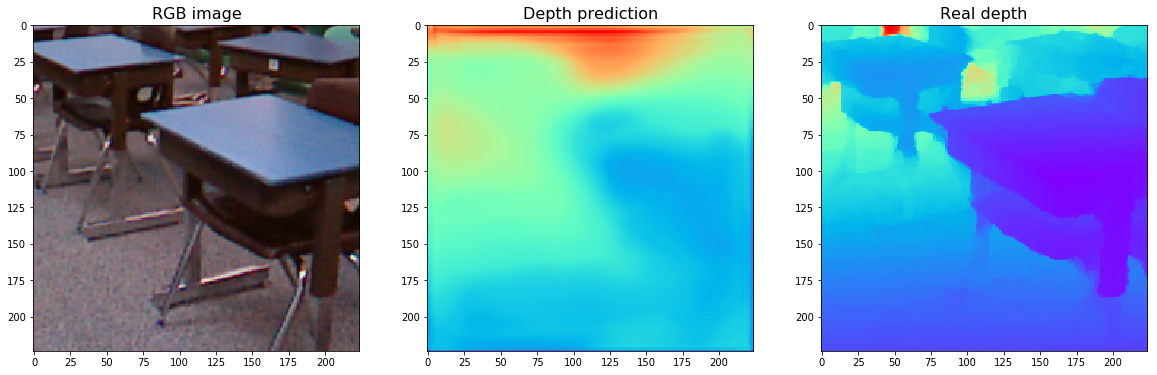

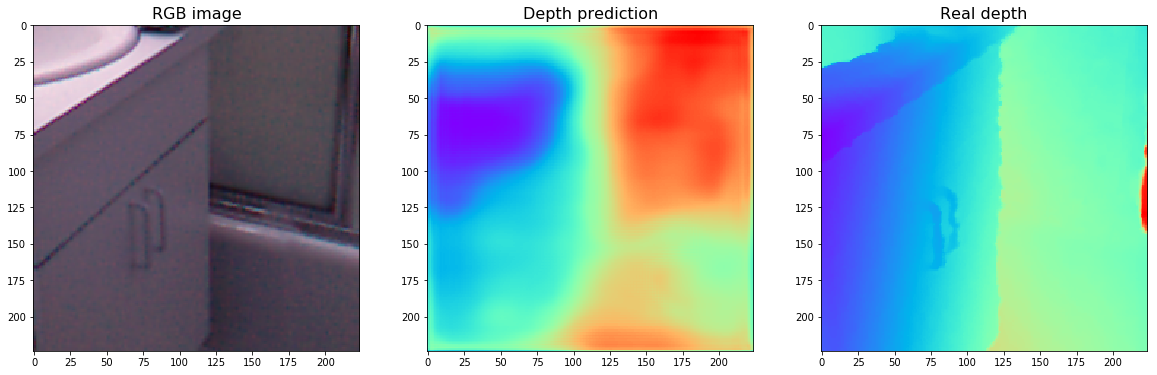

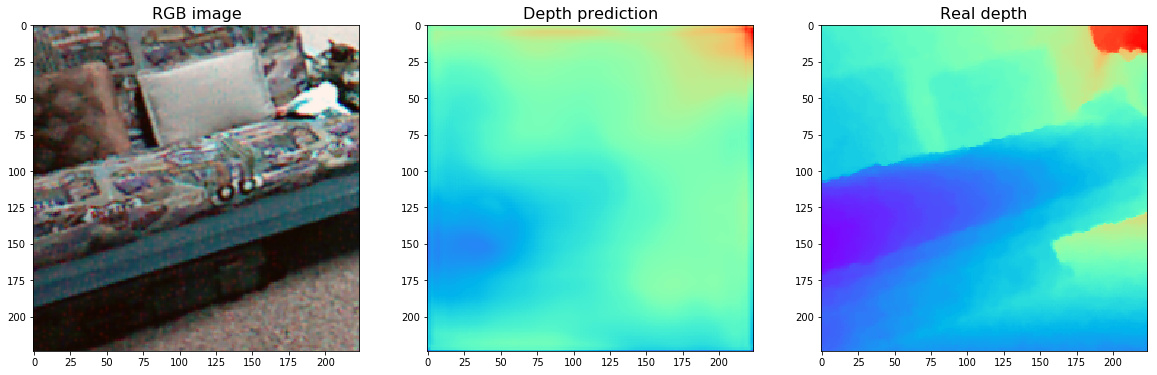

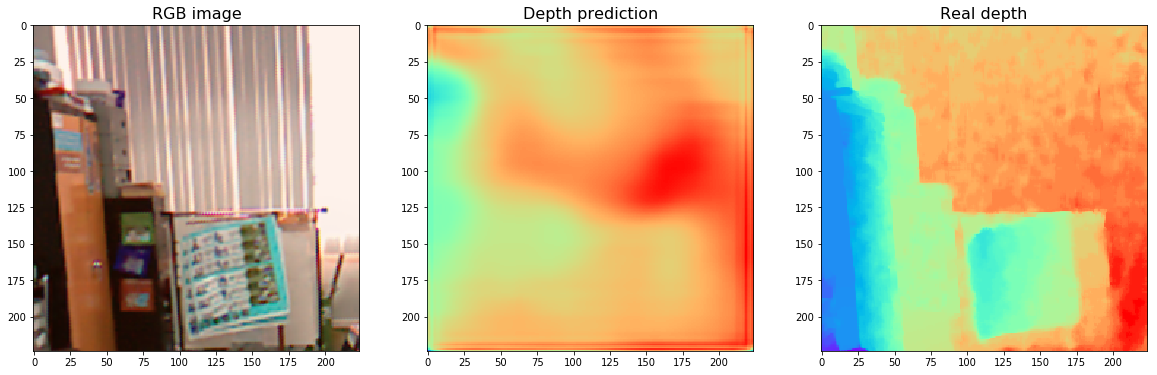

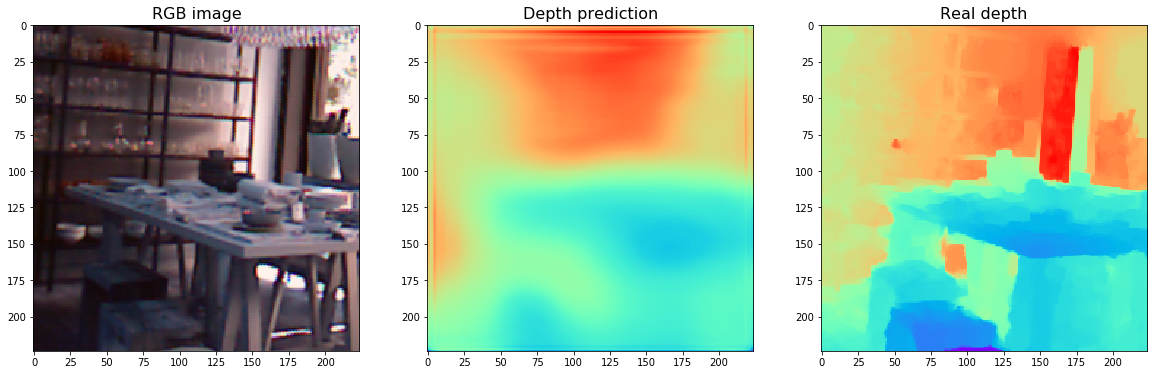

In [16]:
result_id = best_results[3]
best_epoch = losses_list[result_id].argmin()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
#with tf.device('/cpu:0'):
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = model.predict(rgbs_val)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')

### SGD solver, lr =3e-5, decay=1e-6

MSE: 0.25542967855438137


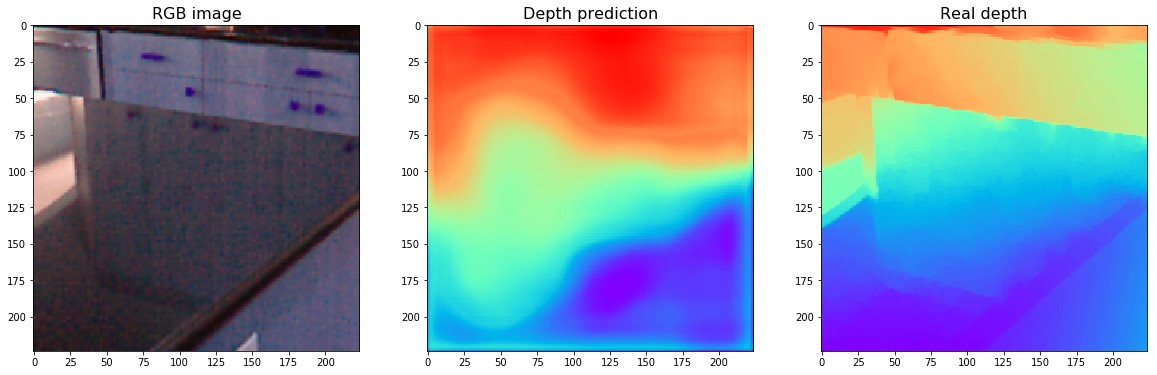

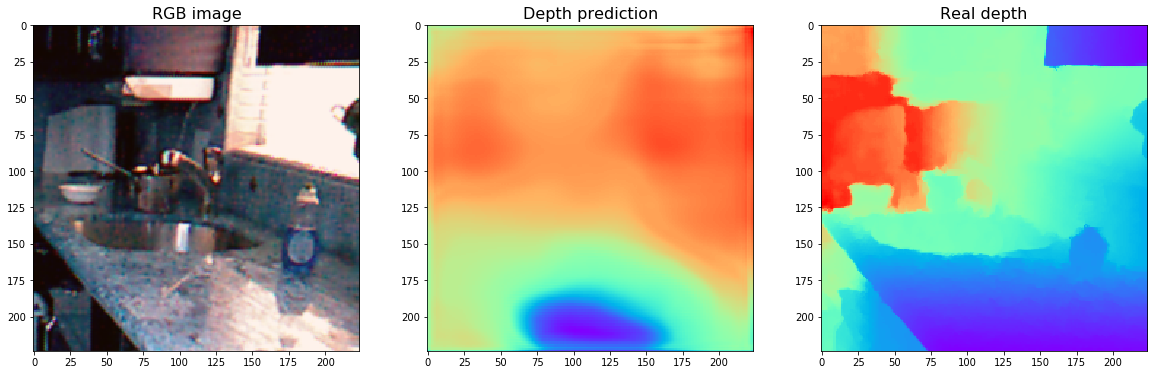

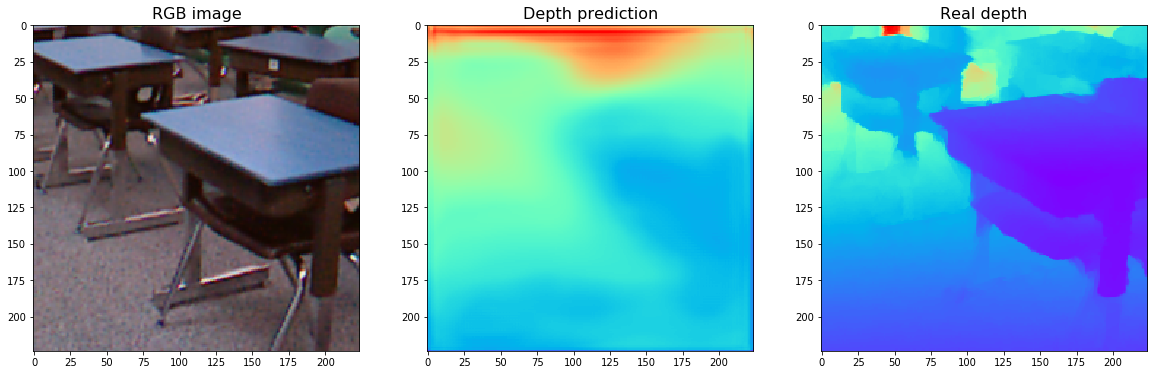

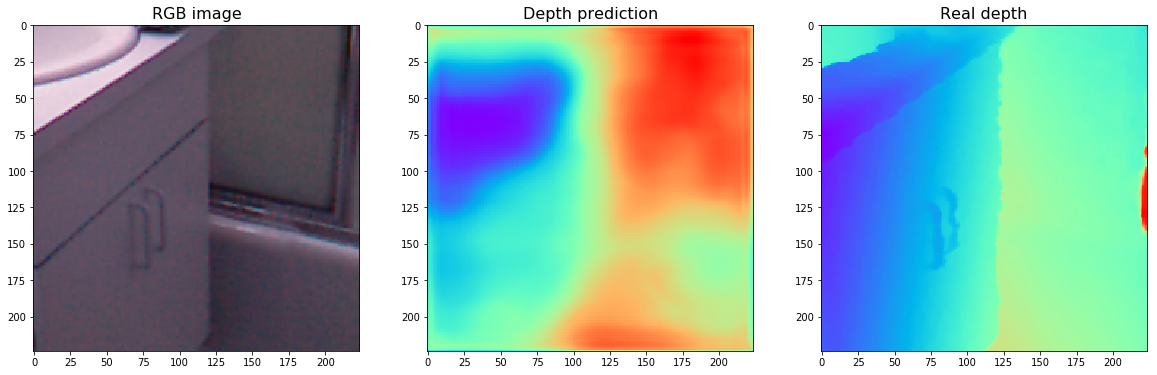

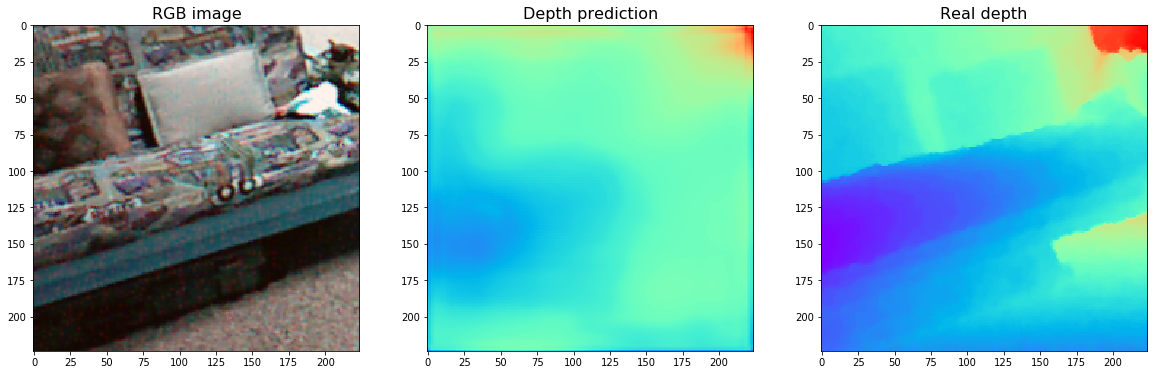

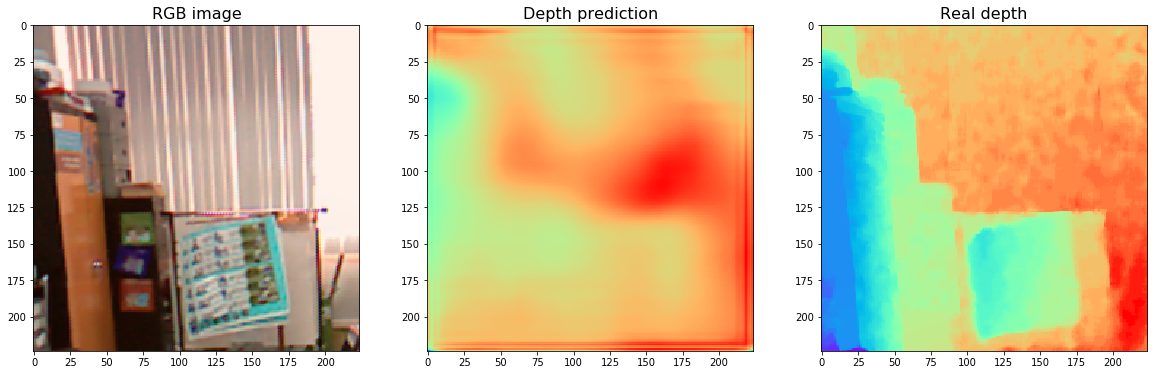

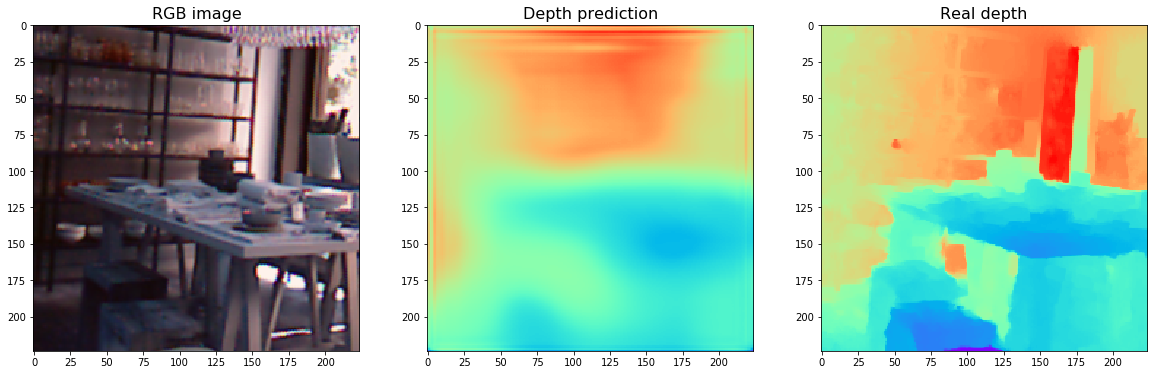

In [17]:
result_id = best_results[4]
best_epoch = losses_list[result_id].argmin()
param = params[result_id]
save_dir = '/home/kmouraviev/FCRN_notebooks/finetune_{}_lr{}_decay{}'.format(
    param['solver'], 
    param['lr'],
    param['decay']
)
#with tf.device('/cpu:0'):
model = load_model(os.path.join(save_dir, 'model_on_epoch{}.hdf5'.format(best_epoch + 1)))
depth_prediction = model.predict(rgbs_val)
print('MSE:', np.mean((depth_prediction - depths_val) ** 2))
for i in range(len(rgbs_val)):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.title('RGB image', fontsize=16)
    plt.imshow(unpreprocess(rgbs_val[i]))
    plt.subplot(1, 3, 2)
    plt.title('Depth prediction', fontsize=16)
    plt.imshow(depth_prediction[i] / 10., cmap='rainbow')
    plt.subplot(1, 3, 3)
    plt.title('Real depth', fontsize=16)
    plt.imshow(depths_val[i] / 10., cmap='rainbow')